In [186]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [187]:
mnist = tf.keras.datasets.mnist
(x_train , y_train),(x_test , y_test) = mnist.load_data()

In [188]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

## Propose an architecture A of a neural network without convolution (the activation function of the output layer should be the softmax function)

### Architecture A

In [207]:
model_A = tf.keras.models.Sequential()
model_A.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_A.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model_A.add(Dropout(0.25))
model_A.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model_A.add(Dropout(0.3))
model_A.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

### Architecture B

In [190]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [191]:
model_B = tf.keras.models.Sequential()
model_B.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model_B.add(Conv2D(64, (3, 3), activation='relu'))
model_B.add(MaxPooling2D(pool_size=(2, 2)))
model_B.add(Dropout(0.25))
model_B.add(Flatten())
model_B.add(Dense(units=128, activation='relu')) 
model_B.add(Dropout(0.5))
model_B.add(Dense(units=10, activation='softmax'))

## Implement architectures A and B, illustrate them in text form and with a diagram (use the functions available in Keras)

In [208]:
model_A.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [193]:
model_A.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_42 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________

In [194]:
from tensorflow.keras.utils import plot_model

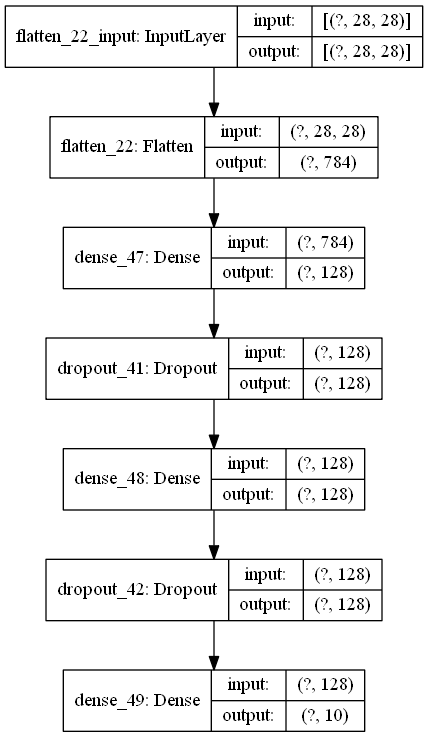

In [195]:
plot_model(model_A, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [197]:
model_B.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.6),
              metrics=['accuracy'])

In [198]:
model_B.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)             

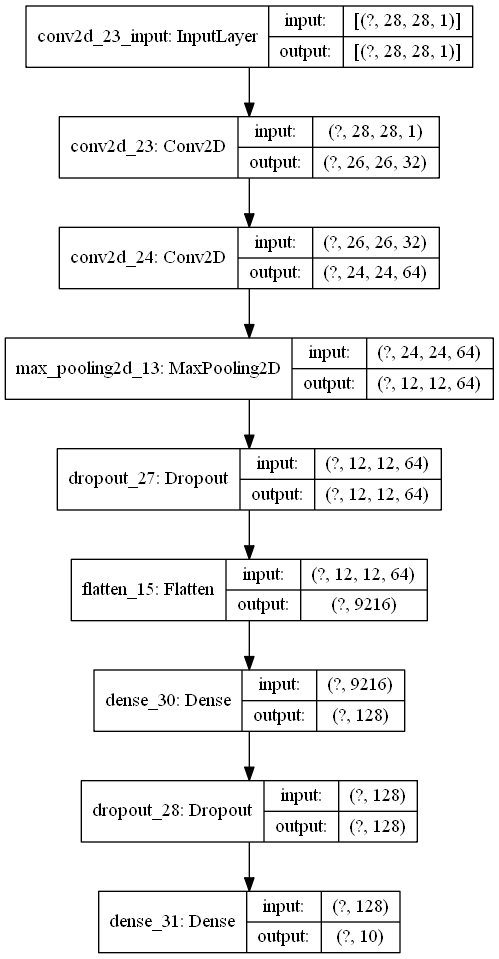

In [141]:
plot_model(model_B, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Train the neural network on the MNIST dataset (training set only)

### Training model_A

In [209]:
train_model_A = model_A.fit(x_train,y_train,epochs = 5,validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3961 - accuracy: 0.8813 - val_loss: 0.1639 - val_accuracy: 0.9513
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1874 - accuracy: 0.9444 - val_loss: 0.1194 - val_accuracy: 0.9643
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1415 - accuracy: 0.9576 - val_loss: 0.1088 - val_accuracy: 0.9675
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1173 - accuracy: 0.9638 - val_loss: 0.1017 - val_accuracy: 0.9701
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1047 - accuracy: 0.9678 - val_loss: 0.1048 - val_accuracy: 0.9702


### Training model_B

In [199]:
train_X = x_train.reshape(-1, 28,28, 1)
test_X = x_test.reshape(-1, 28,28, 1)
print(train_X.shape, test_X.shape)

train_Y = keras.utils.to_categorical(y_train)
test_Y = keras.utils.to_categorical(y_test)

print('y in binary representation:', train_Y[0])
print(train_Y.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
y in binary representation: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


In [200]:
train_model_B = model_B.fit(train_X,train_Y,batch_size = 1000,epochs = 10,validation_split = 0.2)

Epoch 1/10
48/48 [==============================] - 30s 624ms/step - loss: 2.2824 - accuracy: 0.1742 - val_loss: 2.2426 - val_accuracy: 0.4697
Epoch 2/10
48/48 [==============================] - 35s 735ms/step - loss: 2.1473 - accuracy: 0.3938 - val_loss: 1.8776 - val_accuracy: 0.6952
Epoch 3/10
48/48 [==============================] - 36s 759ms/step - loss: 1.3711 - accuracy: 0.6232 - val_loss: 0.6827 - val_accuracy: 0.8328
Epoch 4/10
48/48 [==============================] - 34s 719ms/step - loss: 0.7625 - accuracy: 0.7629 - val_loss: 0.4442 - val_accuracy: 0.8788
Epoch 5/10
48/48 [==============================] - 35s 728ms/step - loss: 0.6049 - accuracy: 0.8130 - val_loss: 0.3676 - val_accuracy: 0.8955
Epoch 6/10
48/48 [==============================] - 35s 737ms/step - loss: 0.5265 - accuracy: 0.8379 - val_loss: 0.3280 - val_accuracy: 0.9039
Epoch 7/10
48/48 [==============================] - 36s 745ms/step - loss: 0.4855 - accuracy: 0.8515 - val_loss: 0.3053 - val_accuracy: 0.9113

## Visualize the evolution of the model’s accuracy 

### Model_A

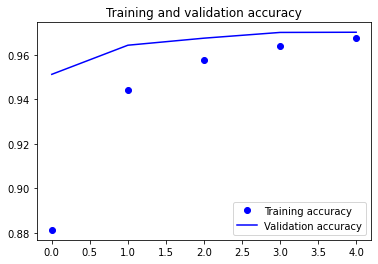

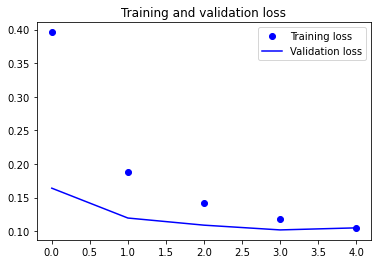

In [210]:
accuracy = train_model_A.history['accuracy']
val_accuracy = train_model_A.history['val_accuracy']
loss = train_model_A.history['loss']
val_loss = train_model_A.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Model_B

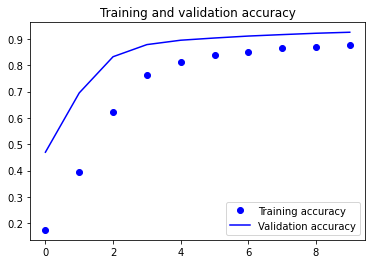

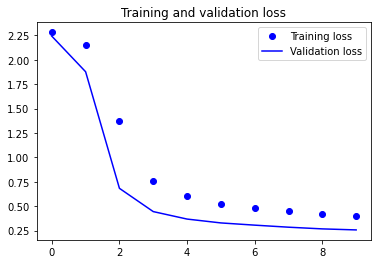

In [202]:
accuracy = train_model_B.history['accuracy']
val_accuracy = train_model_B.history['val_accuracy']
loss = train_model_B.history['loss']
val_loss = train_model_B.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Visualize the prediction of the neural network for a new input image (from the test set)

### Model_A

The result is probably : 2 with probabilty of : 0.9999309778213501 


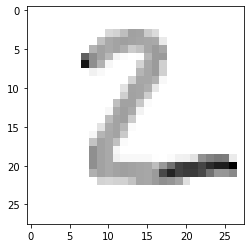

The result is probably : 1 with probabilty of : 0.9998745918273926 


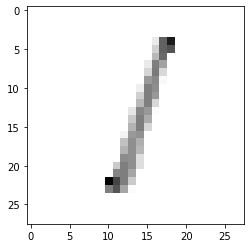

The result is probably : 0 with probabilty of : 0.9993477463722229 


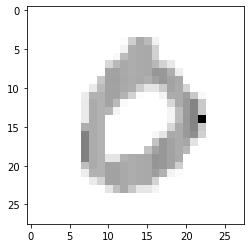

The result is probably : 4 with probabilty of : 0.9999788999557495 


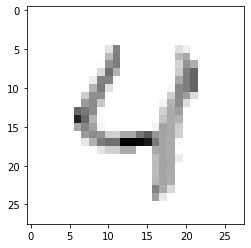

The result is probably : 1 with probabilty of : 0.9998267292976379 


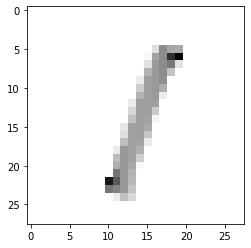

The result is probably : 4 with probabilty of : 0.9999738931655884 


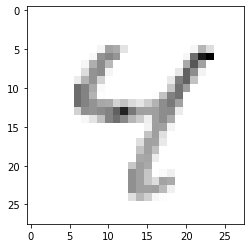

The result is probably : 9 with probabilty of : 0.9889244437217712 


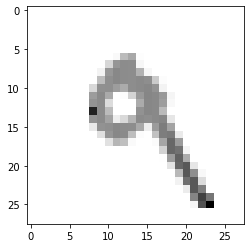

The result is probably : 6 with probabilty of : 0.7168180346488953 


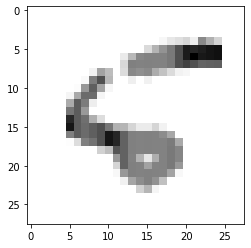

The result is probably : 9 with probabilty of : 0.9956064820289612 


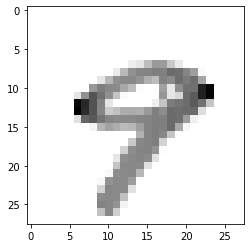

The result is probably : 0 with probabilty of : 0.9999748468399048 


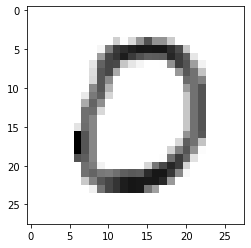

In [211]:
pred_A = model_A.predict(x_test)
for i in range (1,11):
    prediction=pred_A[i]
    print(f'The result is probably : {np.argmax(prediction)} with probabilty of : {prediction[np.argmax(prediction)]} ')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.show()

### Model_B

The result is probably : 2 with probabilty of : 0.9956032037734985 


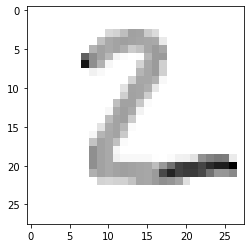

The result is probably : 1 with probabilty of : 0.9972905516624451 


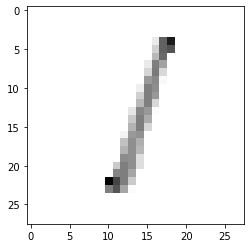

The result is probably : 0 with probabilty of : 0.9961973428726196 


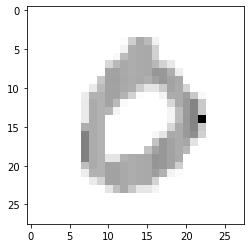

The result is probably : 4 with probabilty of : 0.984480619430542 


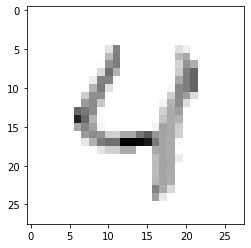

The result is probably : 1 with probabilty of : 0.996317982673645 


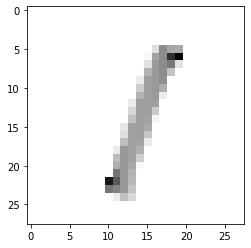

The result is probably : 4 with probabilty of : 0.9013420939445496 


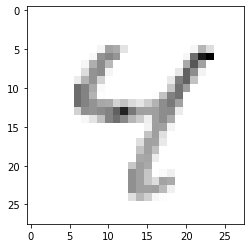

The result is probably : 9 with probabilty of : 0.8511608242988586 


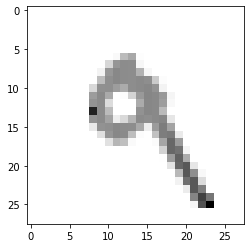

The result is probably : 6 with probabilty of : 0.6852923035621643 


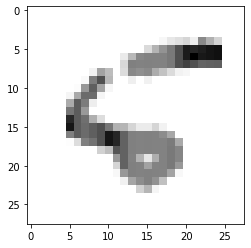

The result is probably : 9 with probabilty of : 0.8220365643501282 


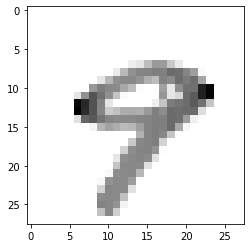

The result is probably : 0 with probabilty of : 0.9924677014350891 


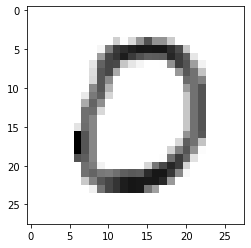

In [204]:
pred_B = model_B.predict(test_X)
for i in range (1,11):
    prediction=pred_B[i]
    print(f'The result is probably : {np.argmax(prediction)} with probabilty of : {prediction[np.argmax(prediction)]} ')
    plt.imshow(test_X[i], cmap=plt.cm.binary)
    plt.show()

##  Evaluate network performance on the MNIST test set

### Model_A

In [205]:
test_eval_A = model_A.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval_A[0])
print('Test accuracy:', test_eval_A[1])

Test loss: 2.2974162101745605
Test accuracy: 0.09830000251531601


### Model_B

In [206]:
test_eval_B = model_B.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', test_eval_B[0])
print('Test accuracy:', test_eval_B[1])

Test loss: 0.25546878576278687
Test accuracy: 0.9225999712944031
